In [53]:
import obspy
from obspy import read
from obspy import read_inventory
from obspy.imaging.beachball import beachball
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client ile alınan data (2020.01.02-japonya) 

In [54]:
client= Client("IRIS")
t1 = UTCDateTime("2020-01-02T18:23:53.011303Z")
t2=t1+300 #5 dakika
st1= client.get_waveforms("G", "INU", "00", "BHZ", t1, t2)

Trace 1: 
 G.INU.00.BHZ | 2020-01-02T18:23:53.011304Z - 2020-01-02T18:28:53.011304Z | 20.0 Hz, 6001 samples
Trace 1 Stats: 
                network: G
               station: INU
              location: 00
               channel: BHZ
             starttime: 2020-01-02T18:23:53.011304Z
               endtime: 2020-01-02T18:28:53.011304Z
         sampling_rate: 20.0
                 delta: 0.05
                  npts: 6001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 5, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 20480})
            processing: ['ObsPy 1.4.1: trim(endtime=UTCDateTime(2020, 1, 2, 18, 28, 53, 11304)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 1, 2, 18, 23, 53, 11304))']


1 Trace(s) in Stream:
G.INU.00.BHZ | 2020-01-02T18:23:53.011304Z - 2020-01-02

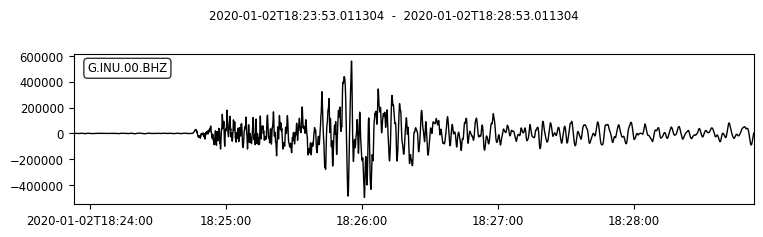

Figure(800x250)


In [55]:
for i in range(len(st1)):
    tr = st1[i] #i. trace i incele
    print(f"Trace {i+1}: \n",tr)
    print(f"Trace {i+1} Stats: \n",tr.stats)
    print("\n")
print(st1) 
print(st1.plot(picker=True))  

aynı datanın EİDA kullanılarak alınan versiyonu (başlangıç ve bitiş zamanları 1dk kaymış durumda)

         network: G
         station: INU
        location: 00
         channel: BHZ
       starttime: 2020-01-02T18:22:53.011304Z
         endtime: 2020-01-02T18:27:52.961304Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 6000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'Q', 'number_of_records': 4, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 53248})


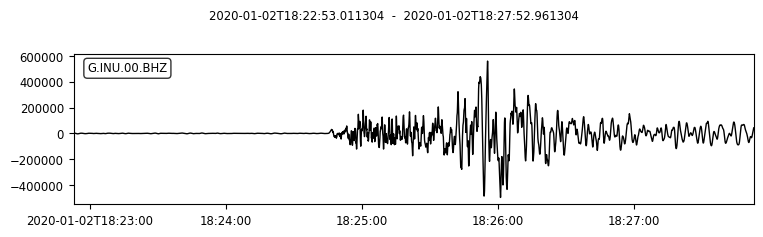

Figure(800x250)


In [56]:
st2 = read(r"C:\Users\sukru\OneDrive\Desktop\Workspace\EarthML\data\package_japan.mseed") 
tr=st2[2]
print(tr.stats)
print(tr.plot())

Trace 1: 
 G.INU.00.BHE | 2020-01-02T18:22:53.011303Z - 2020-01-02T18:27:52.961303Z | 20.0 Hz, 6000 samples
Trace 1 Stats: 
          network: G
         station: INU
        location: 00
         channel: BHE
       starttime: 2020-01-02T18:22:53.011303Z
         endtime: 2020-01-02T18:27:52.961303Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 6000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'Q', 'number_of_records': 4, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 53248})


Trace 2: 
 G.INU.00.BHN | 2020-01-02T18:22:53.011303Z - 2020-01-02T18:27:52.961303Z | 20.0 Hz, 6000 samples
Trace 2 Stats: 
          network: G
         station: INU
        location: 00
         channel: BHN
       starttime: 2020-01-02T18:22:53.011303Z
         endtime: 2020-01-02T18:27:52.961303Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 6000
           calib: 1.0
         _format: MSEED
       

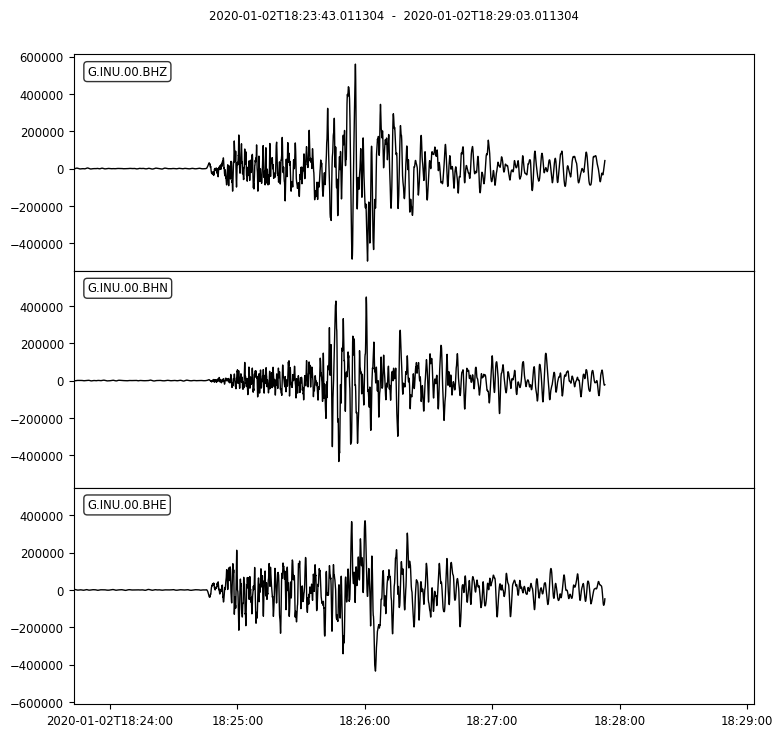

Figure(800x750)


In [57]:
for i in range(len(st2)):
    tr = st2[i] #i. trace i incele
    print(f"Trace {i+1}: \n",tr)
    print(f"Trace {i+1} Stats: \n",tr.stats)
    print("\n")
print(st2) 
print(st2.plot(starttime=st1[0].stats.starttime-10, endtime=st1[0].stats.endtime+10))#3 ayrı trace in plotu (client ile eşzamanlı)

In [58]:
inventory= read_inventory(r"C:\Users\sukru\OneDrive\Desktop\Workspace\EarthML\data\inv_japan.xml")
print(inventory)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sukru\\OneDrive\\Desktop\\Workspace\\EarthML\\inv_japan.xml'

PLOTLAR (buradan itibaren client data kullanıyorum)

In [ ]:
st1.plot(starttime=st1[0].stats.starttime-10, endtime=st1[0].stats.endtime+10,color='red',bgcolor='black',linewidth='0.6');

In [ ]:
st1.plot(type="dayplot",starttime=st1[0].stats.starttime-10, endtime=st1[0].stats.endtime+10,color='red',bgcolor='black',linewidth='0.6');

spektogram

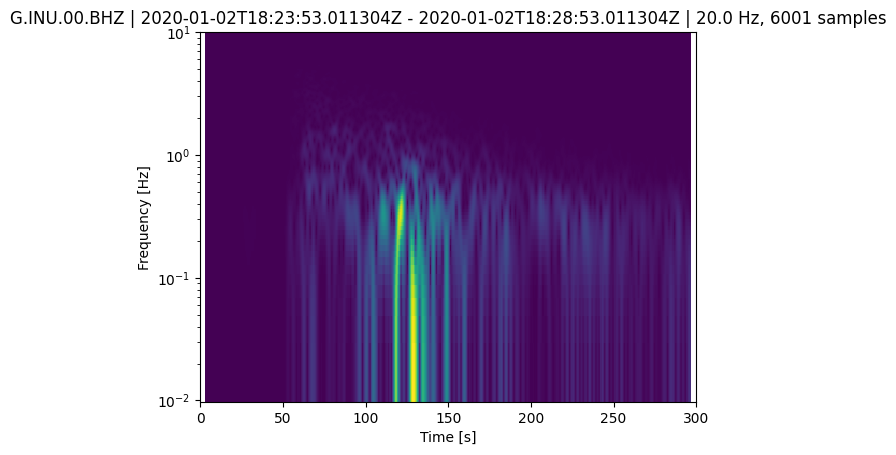

[None]

In [60]:
st1.spectrogram(log=True)

beachball (elimdeki mseed data ile focal mechanism bulmayı anlayamadım)

In [ ]:
np1 = [150, 40, 1]
fig = beachball(np1)  

In [ ]:
mt = [-2.39, 1.04, 1.35, 0.57, -2.94, -0.94]
fig = beachball(mt) 

internetten araştırarak focal mechanism için gerekli verileri aşağıdaki şekilde aldım ama bu verileri invert etmek için obspy kullanamıyorum sanırım o yüzden beachball için anlamlı bir veriye ulaşamadım. 

In [ ]:
client= Client("IRIS")
t1 = UTCDateTime("2020-01-02T18:23:53.011303Z")
t2=t1+300 #5 dakika
st1= client.get_waveforms("G", "INU", "00", "BHZ", t1, t2)

st1.plot(tyoe="relative",method="full",picker=True)

st1.filter('bandpass', freqmin=0.1, freqmax=1.0)

st1.plot()

from obspy.signal.trigger import classic_sta_lta, trigger_onset
tr = st1[0]  
cft = classic_sta_lta(tr.data, int(5 * tr.stats.sampling_rate), int(10 * tr.stats.sampling_rate))
onset = trigger_onset(cft, 1.5, 0.5)

p_pick = UTCDateTime("2020-01-02T18:24:45")  # aproximate P-wave arrival time of japan earhquake

from obspy.core.event import Pick, WaveformStreamID
pick = Pick(time=p_pick, waveform_id=WaveformStreamID(network_code="IU", station_code="ANMO"),
            phase_hint="P", onset="impulsive", polarity="positive")  # "positive" for upward (?)